In [152]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Inspecting Dataset

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [154]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In the dataset there are a total of 730 rows and 16 columns in which we need to use the 'cnt' column for the prediction purposes and will be target variable.

# Check missing values

In [155]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In dataset there are no missing values

# Check for duplicate values

In [156]:
df_copy = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_copy.drop_duplicates(subset=None, inplace=True)

df_copy.shape == df.shape

True

In dataset there are no duplicate values

# Data cleaning
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : This is a index column, we have a default index for the same purpose

dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.

In [157]:
columns_to_exclude = ['instant', 'dteday', 'casual', 'registered']

# Drop the columns
df_excluded = df.drop(columns=columns_to_exclude)

df_excluded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Visualising the Data

Here we'll do the following tasks:
<ul>
<li>We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
<li>Checking if there are any multicollinearity that exist
<li>Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable
</ul>

Visualising Numeric Variables : Using a pairplot

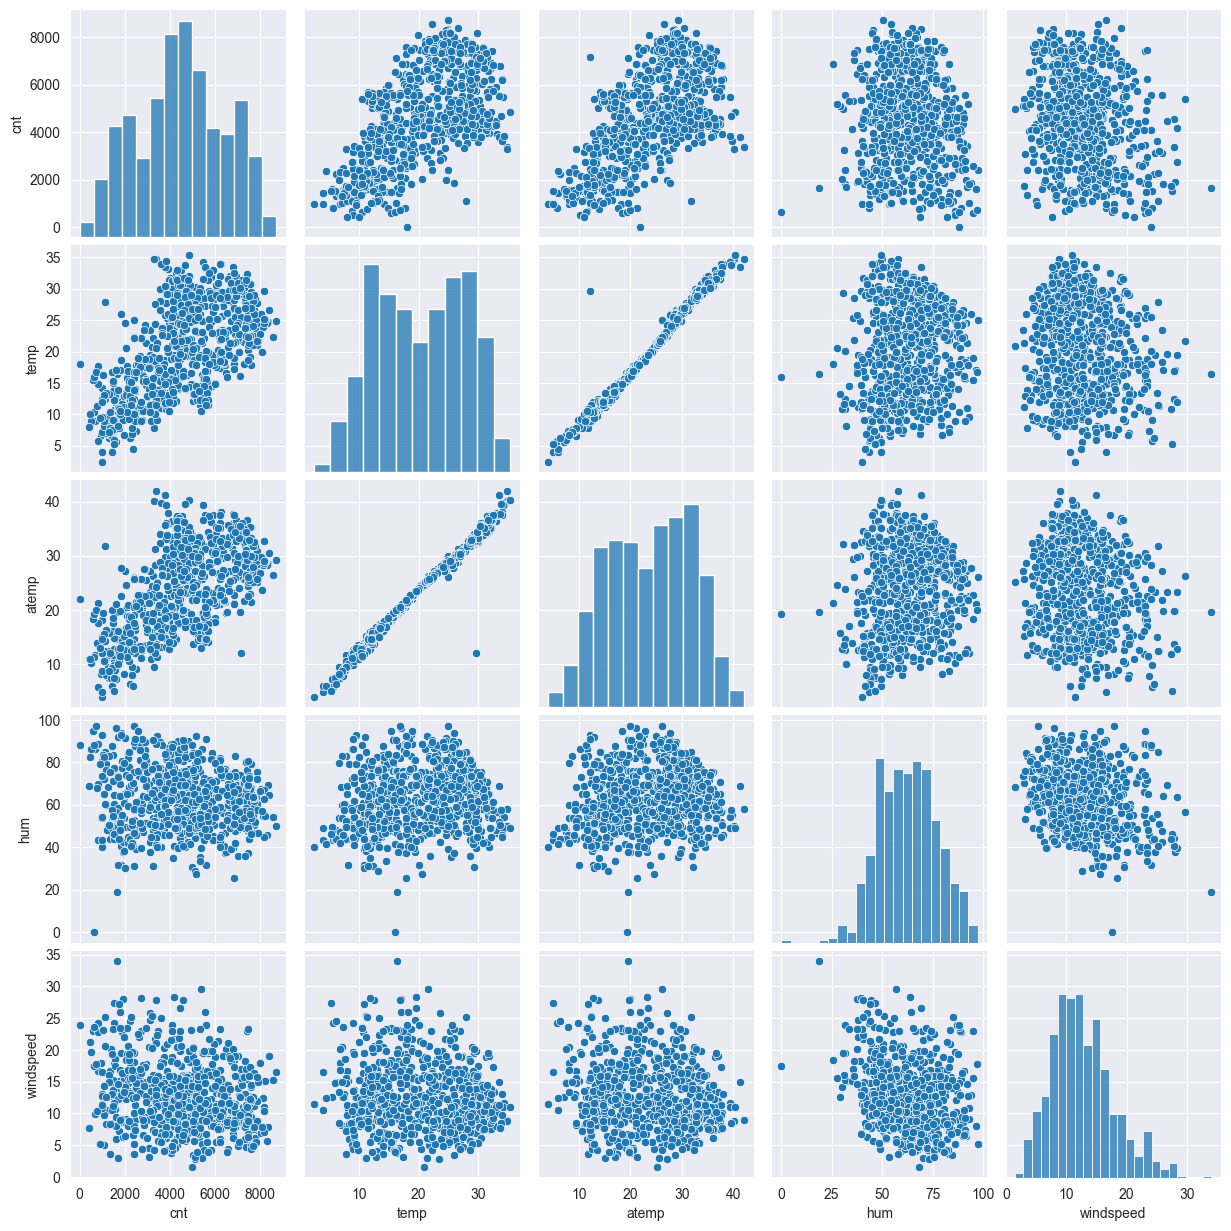

In [158]:
numerical_vars = ['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=df_excluded, vars=numerical_vars)
plt.show()

By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like `atemp`, `temp`. that show a positive correlation with the target variable `cnt`.

In [159]:
# Calculate correlation matrix
corr_matrix = df_excluded.corr()

# Specify the variable to calculate correlation with
target_variable = 'cnt'

# Sort the correlation values for the target variable in descending order
sorted_correlation = corr_matrix[target_variable].sort_values(ascending=False)

# Get the second highest correlation value and the corresponding variable name
second_highest_correlation = sorted_correlation.iloc[1]  # Index 0 is the variable itself
second_highest_variable = sorted_correlation.index[1]

print("Second highest correlation with respect to variable 'cnt':", second_highest_correlation)
print("Corresponding variable:", second_highest_variable)

Second highest correlation with respect to variable 'cnt': 0.6306853489531029
Corresponding variable: atemp


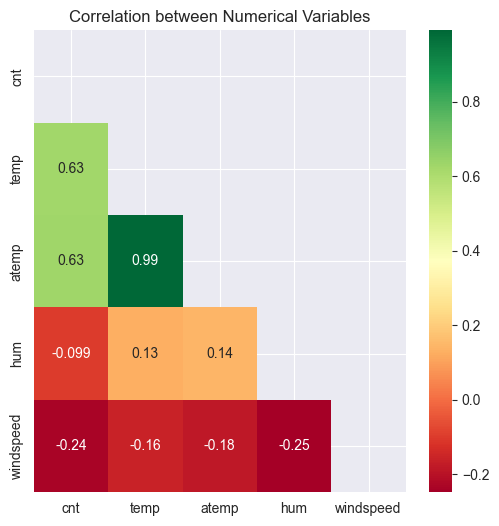

In [160]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(df_excluded[numerical_vars].corr())
sns.heatmap(df[numerical_vars].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between `temp` and `atemp`. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

Visualising Categorical Variables : Using a boxplot

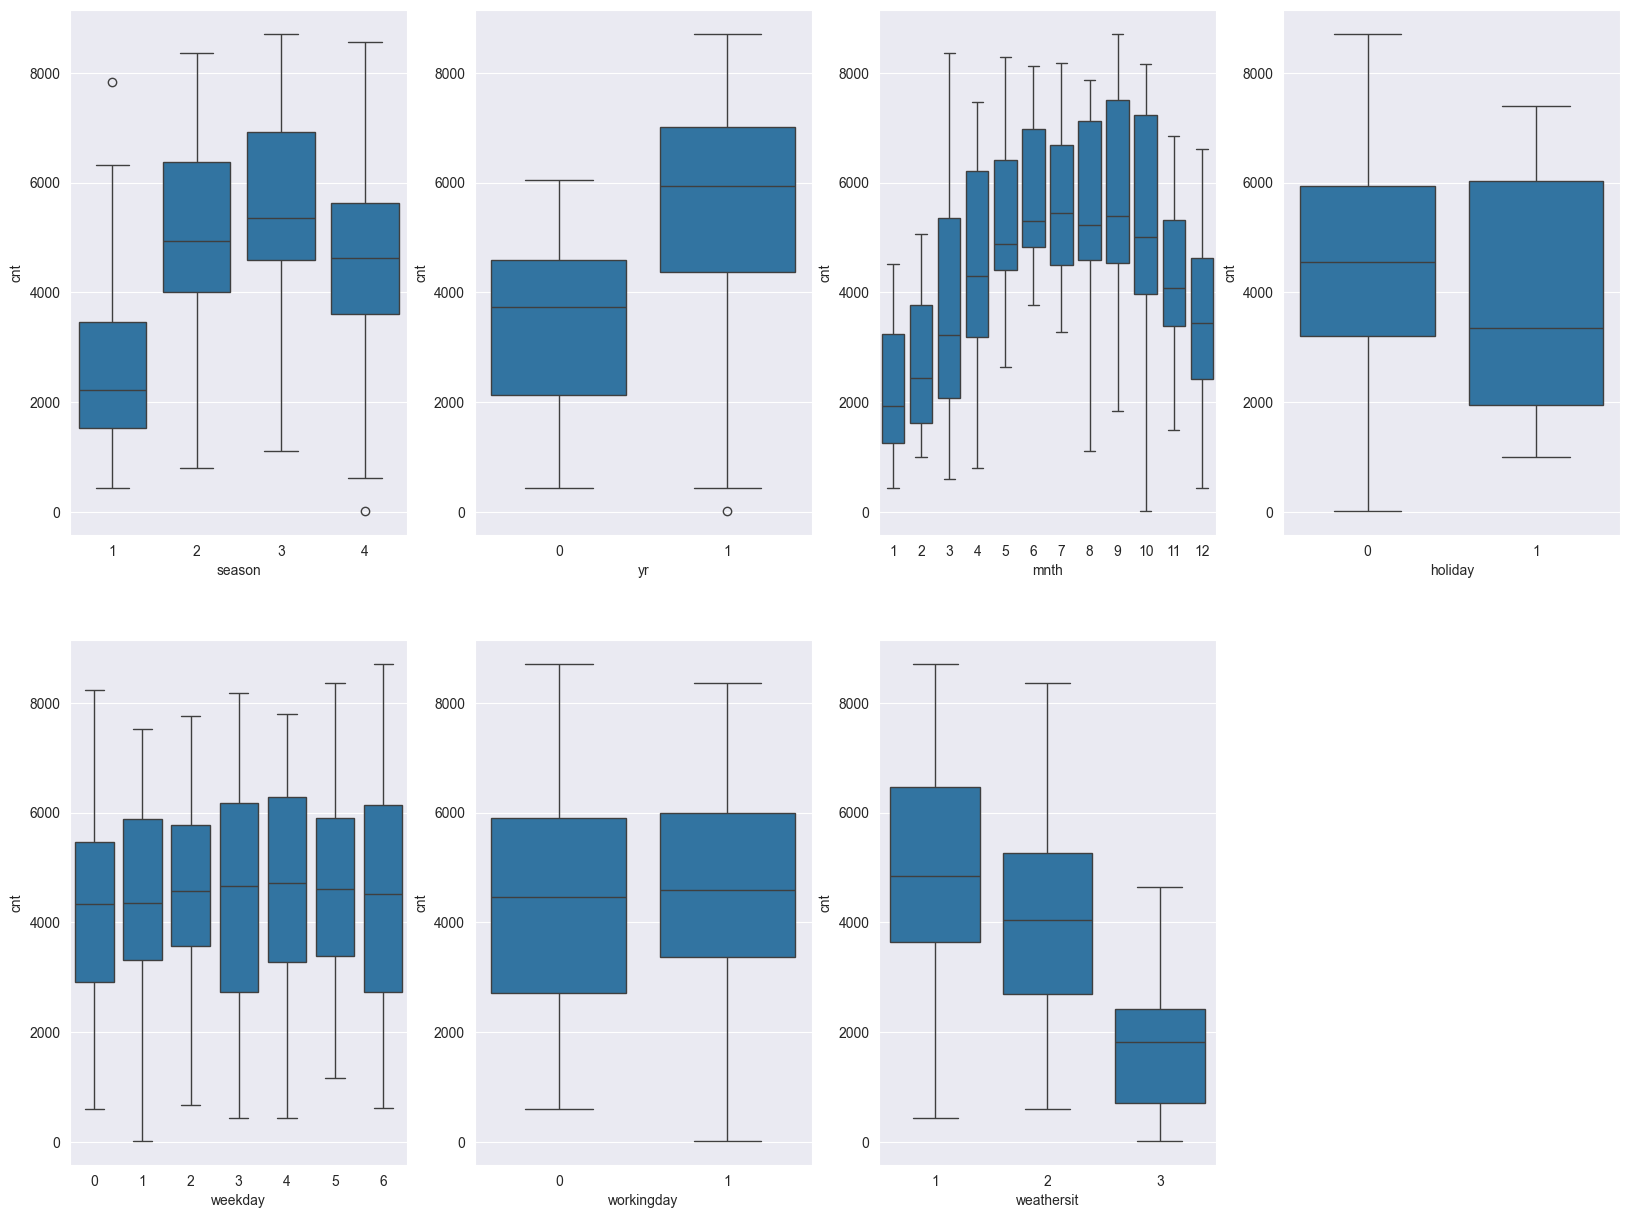

In [161]:

def plotCategoricalVariables(data, columns, target_column):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns):
        plt.subplot(2,4,i+1)
        sns.boxplot(data, x = column, y = target_column)
    plt.show()

columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plotCategoricalVariables(df_excluded, columns, 'cnt')

we can draw below conclusions from above graphs
<ul>
<li>The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
<li>For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.
<li>The year 2019 had a higher count of users as compared to the year 2018.
<li>The count of rentals is almost even throughout the week.
<li>There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.
<li>The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.
<li>The count of users is less during the holidays.
<li>From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.
</ul>

# Data Preparation

In [162]:
import calendar

df_excluded['mnth'] = df_excluded['mnth'].apply(lambda x: calendar.month_abbr[x])

# Maping seasons
df_excluded["season"] = df_excluded["season"].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mapping weathersit
df_excluded["weathersit"] = df_excluded["weathersit"].map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

#Mapping Weekday
df_excluded["weekday"] = df_excluded["weekday"].apply(lambda x: calendar.day_name[x])

df_excluded.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Monday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Creating Dummy Variables
The variables `mnth`, `weekday`, `season`, `weathersit` have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [163]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy_columns = ['season','mnth','weekday','weathersit']
dummy_df = df_excluded[dummy_columns]

dummy_df


,season,mnth,weekday,weathersit
0,Spring,Jan,Sunday,Mist & Cloudy
1,Spring,Jan,Monday,Mist & Cloudy
2,Spring,Jan,Tuesday,Clear
3,Spring,Jan,Wednesday,Clear
4,Spring,Jan,Thursday,Clear
...,...,...,...,...
725,Spring,Dec,Friday,Mist & Cloudy
726,Spring,Dec,Saturday,Mist & Cloudy
727,Spring,Dec,Sunday,Mist & Cloudy
728,Spring,Dec,Monday,Clear


In [164]:
dummy = pd.get_dummies(dummy_df,drop_first=True, dtype=int)
dummy

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [165]:
# Adding the dummy variables to the original dataset
bike_df1 = pd.concat([dummy,df_excluded],axis = 1)

#Deleting the orginal columns season, weathersit, weekday, mnth
bike_df1.drop(dummy_columns,axis=1,inplace=True)

bike_df1.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [166]:
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    int64  
 1   season_Summer                 730 non-null    int64  
 2   season_Winter                 730 non-null    int64  
 3   mnth_Aug                      730 non-null    int64  
 4   mnth_Dec                      730 non-null    int64  
 5   mnth_Feb                      730 non-null    int64  
 6   mnth_Jan                      730 non-null    int64  
 7   mnth_Jul                      730 non-null    int64  
 8   mnth_Jun                      730 non-null    int64  
 9   mnth_Mar                      730 non-null    int64  
 10  mnth_May                      730 non-null    int64  
 11  mnth_Nov                      730 non-null    int64  
 12  mnth_Oct                      730 non-null    int64  
 13  mnth_

# Splitting the Data into Training and Testing Sets

In [167]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bike_df1, train_size = 0.7, random_state = 100)

print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


# Rescaling the Features
Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiple linear regression it might impact the model. As we can see that the value of the feature `cnt` has much higher values as compared to the other features like `temp`, `atemp` etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

<ul>
<li>Min-Max scaling
<li>Standardisation (mean-0, sigma-1)
</ul>

This time, we will use MinMax scaling.

In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
scaler_vars = ['cnt','hum','windspeed','temp','atemp']

train[scaler_vars] = scaler.fit_transform(train[scaler_vars])

train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [169]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking the coefficients to see which variables are highly correlated

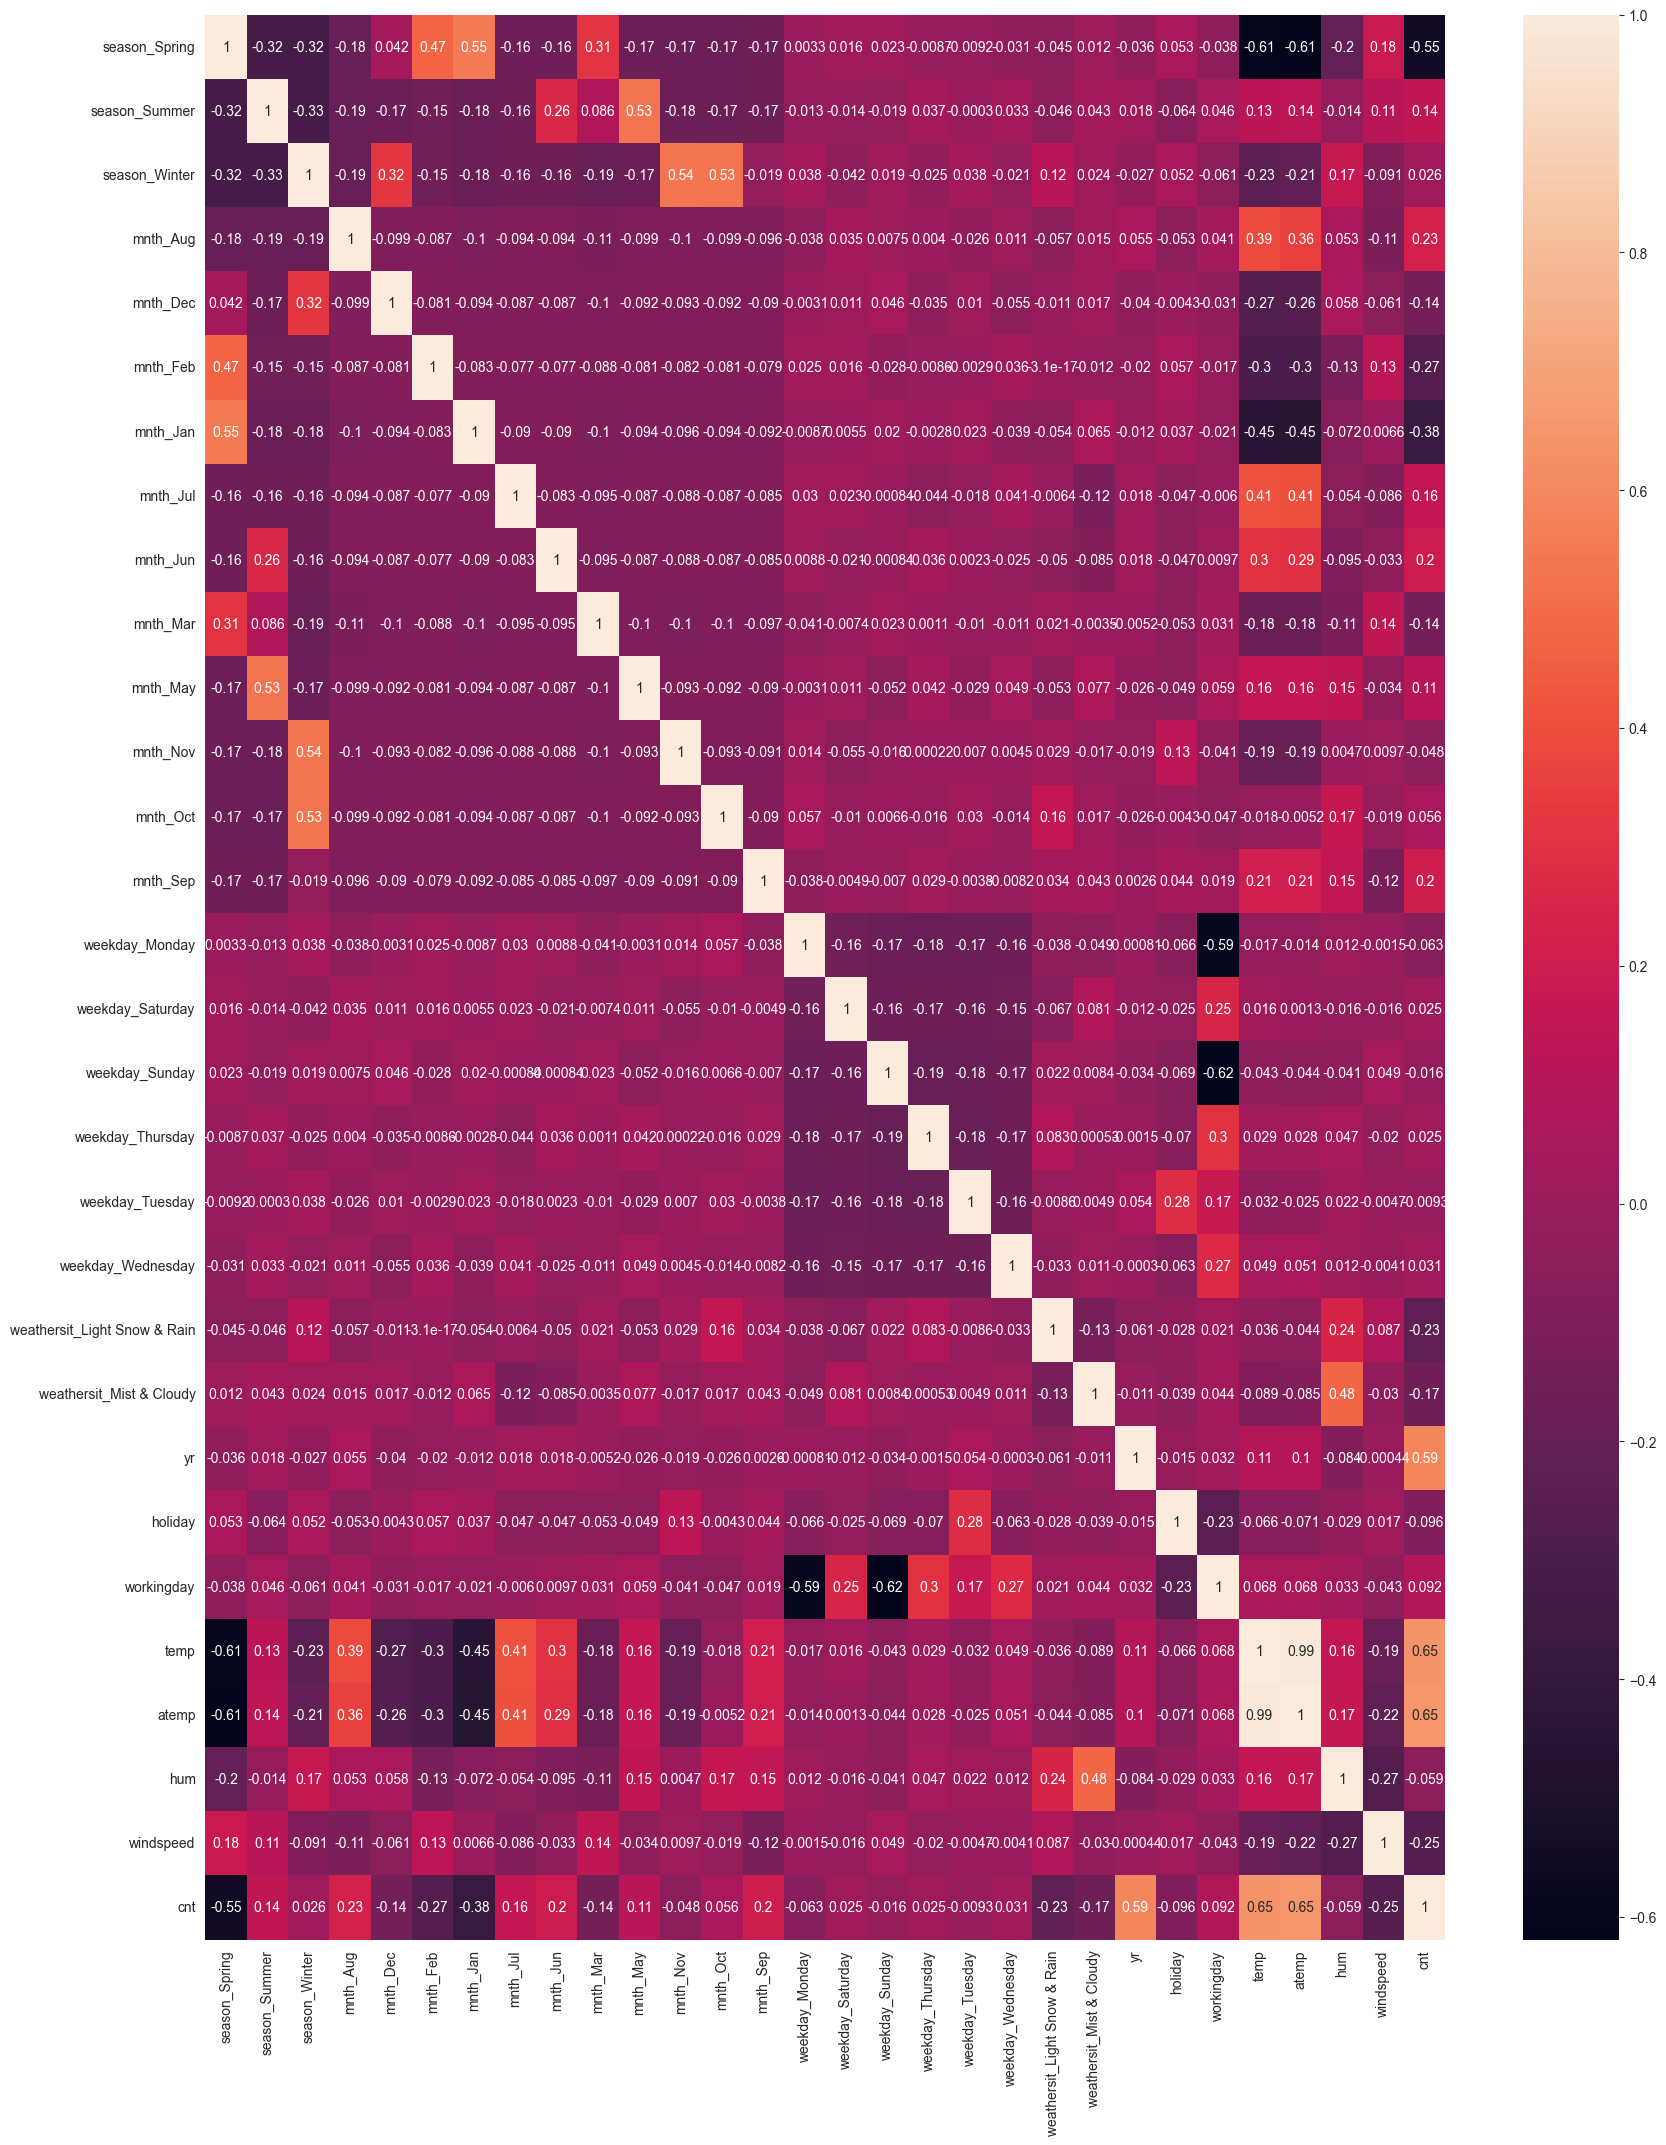

In [170]:
#Checking if the variables are highly correlated
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True)
plt.show()

As can be seen from the map, `cnt`  have correlation with `year` and `temp`. Similarly, `Misty` and `humidity` show correlation. `Spring season` with `Jan and Feb` month, `Summer season` with `may` month and `Winter` season with `oct` and `nov` month show good correlation.

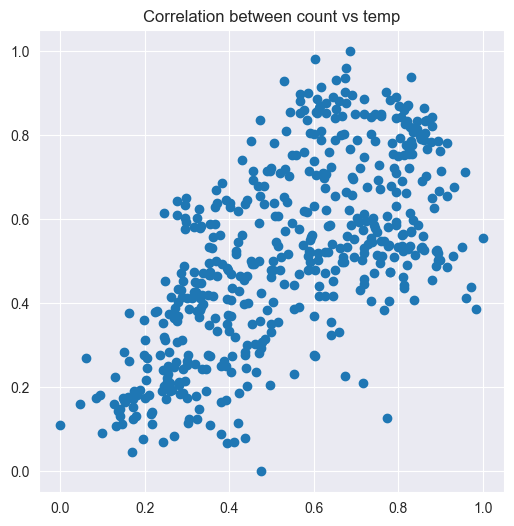

In [171]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(train["temp"], train["cnt"])
plt.title('Correlation between count vs temp')
plt.show()

# Dividing into X and Y sets for the model building

In [172]:
y_train = train.pop('cnt')
X_train = train

y_train.shape

(510,)

In [173]:
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [174]:
X_train.head(5)

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981


# Building a linear model
APPROACH USED :

We will use the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will use RFE for automated approach, along with VIF to determine the variables to drop.

# Feature Selection
We start with 15 variables.
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [175]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', False, 3),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 14),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 4),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 6),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 11),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 15),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [176]:
#getting the selected feature variables in one variable
true_rfe = X_train.columns[rfe.support_]
true_rfe

Index(['season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep',
       'weekday_Monday', 'weekday_Sunday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [177]:
X_train.columns[~rfe.support_]

Index(['season_Spring', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

# Building model using statsmodel for the detailed statistics

For statsmodels, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [178]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[true_rfe]

X_train_rfe.head()

,season_Summer,season_Winter,mnth_Aug,mnth_Jan,mnth_Sep,weekday_Monday,weekday_Sunday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,0,0,1,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1,0,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,1,0,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


# Building the first linear model

In [179]:
import statsmodels.api as sm

#Function to build a model using statsmodel api
def buildModel(targetVar, constVar):
    #adding constant to training variable
    train_lm = sm.add_constant(constVar)

    #creating training model
    lr = sm.OLS(targetVar, train_lm)

    #fit
    lr_model = lr.fit()

    print (lr_model.summary())
    return train_lm, lr_model

# Model 1

In [180]:
#creating first training model with rfe selected variables
X_train_rfe, lr_model = buildModel(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.01e-191
Time:                        20:29:06   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [181]:
#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

# Checking VIF for multicollinearity

`Variance Inflation Factor (VIF)` and `p-value` are commonly used metrics to assess multicollinearity and statistical significance, respectively, in regression analysis.

VIF gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.



<h3>How to check the conditions for variables elimination?</h3>
Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF and p-values.

<ul>
<li>High p-value, high VIF : definitely drop

<li>High-Low:
<ol>
<li>High p, low VIF : remove these first, then build model again and check VIF again
<li>Low p, high VIF : remove these later
</ol>
</li>Low p-value, low VIF : keep variable
</ul>

In [182]:
low_vif_threshold = 5  #threshold for low VIF
high_p_value_threshold = 0.05  #threshold for high p-value

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    # Calculate the VIFs for the model
    vif = pd.DataFrame()
    vif['Features'] = data_frame.columns
    vif['VIF'] = [round(variance_inflation_factor(data_frame.values, i), 2) for i in range(data_frame.shape[1])]

    vif.sort_values(by = 'VIF', ascending=False)
    print (vif)
    return vif

def concatenatePValuesWithVIF(model, vif):
    p_values = model.pvalues
    p_values = p_values.drop('const')  # Drop the intercept p-value

    vif_p_values = pd.concat([vif.set_index('Features'), p_values.to_frame(name='p_value')], axis=1)
    return vif_p_values

def getFeaturesWithLowVIFAndHighPValue(model, vif):
    vif_p_values = concatenatePValuesWithVIF(model, vif)

    # Filtering features with low VIF and high p-value
    low_vif_high_p = vif_p_values[(vif_p_values['VIF'] < low_vif_threshold) & (vif_p_values['p_value'] > high_p_value_threshold)]

    return low_vif_high_p

def getFeaturesWithHighVIFAndLowPValue(model, vif):
    vif_p_values = concatenatePValuesWithVIF(model, vif)

    # Filtering features with low VIF and low p-value
    high_vif_low_p = vif_p_values[(vif_p_values['VIF'] > low_vif_threshold) & (vif_p_values['p_value'] < high_p_value_threshold)]

    return high_vif_low_p

def getHighPValueFeatures(model):
    # Getting p-values
    p_values = model.pvalues

    # Filtering features with high p-values (e.g., p > 0.05)
    high_p_value_features = p_values[p_values > high_p_value_threshold]

    return high_p_value_features

def getHighVifFeatures(vif):
    # Filtering features with high VIF (e.g., VIF > 5)
    high_vif_features = vif[vif['VIF'] > low_vif_threshold]

    return high_vif_features

def analyzeFeatures(model, vif):
    high_vif_low_p = getFeaturesWithHighVIFAndLowPValue(model, vif)
    low_vif_high_p = getFeaturesWithLowVIFAndHighPValue(model, vif)
    high_p = getHighPValueFeatures(model)
    high_vif = getHighVifFeatures(vif)

    data = {
    'High VIF Low P value': high_vif_low_p,
    'Low VIF High P value': low_vif_high_p,
    'High P value': high_p,
    'High VIF':  high_vif
    }

    return data


In [183]:
vif = calculate_vif(X_train_rfe)

                        Features    VIF
0                  season_Summer   1.48
1                  season_Winter   1.58
2                       mnth_Aug   1.45
3                       mnth_Jan   1.55
4                       mnth_Sep   1.22
5                 weekday_Monday   8.20
6                 weekday_Sunday   8.38
7   weathersit_Light Snow & Rain   1.24
8       weathersit_Mist & Cloudy   1.56
9                             yr   1.03
10                       holiday   2.24
11                    workingday  34.00
12                          temp   1.94
13                           hum   1.88
14                     windspeed   1.19


In [184]:
analyzeFeatures(lr_model, vif)

{'High VIF Low P value':                   VIF       p_value
 weekday_Monday   8.20  4.172650e-03
 weekday_Sunday   8.38  4.004923e-14
 workingday      34.00  7.248869e-17,
 'Low VIF High P value':           VIF   p_value
 holiday  2.24  0.261991,
 'High P value': holiday    0.261991
 dtype: float64,
 'High VIF':           Features    VIF
 5   weekday_Monday   8.20
 6   weekday_Sunday   8.38
 11      workingday  34.00}

We will drop feature `workingday` which has highest VIF of 34

In [185]:
# dropping workingday since its vif is highest
X_train_new_1 = X_train_rfe.drop(['workingday'], axis=1)

# Model 2

In [186]:
X_train_lr1, lr_model = buildModel(y_train, X_train_new_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.01e-191
Time:                        20:29:07   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [187]:
#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [188]:
# Calculate the VIFs for the new model
vif = calculate_vif(X_train_new_1)

                        Features    VIF
0                  season_Summer   1.96
1                  season_Winter   2.05
2                       mnth_Aug   1.60
3                       mnth_Jan   1.55
4                       mnth_Sep   1.32
5                 weekday_Monday   1.23
6                 weekday_Sunday   1.23
7   weathersit_Light Snow & Rain   1.19
8       weathersit_Mist & Cloudy   2.17
9                             yr   2.04
10                       holiday   1.05
11                          temp  11.43
12                           hum  18.41
13                     windspeed   3.68


In [189]:
analyzeFeatures(lr_model, vif)

{'High VIF Low P value':         VIF       p_value
 temp  11.43  1.944794e-71
 hum   18.41  1.816266e-05,
 'Low VIF High P value':                  VIF  p_value
 weekday_Sunday  1.23  0.42133,
 'High P value': weekday_Sunday    0.42133
 dtype: float64,
 'High VIF':    Features    VIF
 11     temp  11.43
 12      hum  18.41}

In [190]:
#weekday_Sunday variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['weekday_Sunday'], axis = 1)

# Model 3

In [191]:
X_train_lr2, lr_model = buildModel(y_train, X_train_new_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          9.35e-193
Time:                        20:29:07   Log-Likelihood:                 518.04
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     496   BIC:                            -948.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [192]:
#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [193]:
vif = calculate_vif(X_train_new_2)

                        Features    VIF
0                  season_Summer   1.96
1                  season_Winter   2.04
2                       mnth_Aug   1.60
3                       mnth_Jan   1.55
4                       mnth_Sep   1.32
5                 weekday_Monday   1.19
6   weathersit_Light Snow & Rain   1.19
7       weathersit_Mist & Cloudy   2.17
8                             yr   2.04
9                        holiday   1.05
10                          temp  11.43
11                           hum  18.36
12                     windspeed   3.63


In [194]:
analyzeFeatures(lr_model, vif)

{'High VIF Low P value':         VIF       p_value
 temp  11.43  1.857461e-71
 hum   18.36  1.546331e-05,
 'Low VIF High P value': Empty DataFrame
 Columns: [VIF, p_value]
 Index: [],
 'High P value': Series([], dtype: float64),
 'High VIF':    Features    VIF
 10     temp  11.43
 11      hum  18.36}

In [195]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

# Model 4

In [196]:
X_train_lr3, lr_model = buildModel(y_train, X_train_new_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          6.83e-190
Time:                        20:29:07   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [197]:
#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [198]:
vif = calculate_vif(X_train_new_3)

                        Features   VIF
0                  season_Summer  1.89
1                  season_Winter  1.56
2                       mnth_Aug  1.60
3                       mnth_Jan  1.23
4                       mnth_Sep  1.32
5                 weekday_Monday  1.17
6   weathersit_Light Snow & Rain  1.08
7       weathersit_Mist & Cloudy  1.54
8                             yr  2.04
9                        holiday  1.04
10                          temp  5.14
11                     windspeed  3.36


In [199]:
analyzeFeatures(lr_model, vif)

{'High VIF Low P value':        VIF       p_value
 temp  5.14  1.541006e-67,
 'Low VIF High P value': Empty DataFrame
 Columns: [VIF, p_value]
 Index: [],
 'High P value': Series([], dtype: float64),
 'High VIF':    Features   VIF
 10     temp  5.14}

In [200]:
bike_df1['windspeed'].corr(bike_df1['cnt'])

-0.23513249514103673

In [201]:
#windspeed variable can be dropped due to negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

# Model 5

In [202]:
X_train_lr4, lr_model = buildModel(y_train, X_train_new_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          9.93e-183
Time:                        20:29:07   Log-Likelihood:                 488.64
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     498   BIC:                            -902.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [203]:
#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [204]:
vif = calculate_vif(X_train_new_4)

                        Features   VIF
0                  season_Summer  1.84
1                  season_Winter  1.52
2                       mnth_Aug  1.59
3                       mnth_Jan  1.14
4                       mnth_Sep  1.30
5                 weekday_Monday  1.17
6   weathersit_Light Snow & Rain  1.06
7       weathersit_Mist & Cloudy  1.52
8                             yr  2.00
9                        holiday  1.04
10                          temp  4.06


In [205]:
analyzeFeatures(lr_model, vif)

{'High VIF Low P value': Empty DataFrame
 Columns: [VIF, p_value]
 Index: [],
 'Low VIF High P value':            VIF   p_value
 mnth_Jan  1.14  0.105314,
 'High P value': mnth_Jan    0.105314
 dtype: float64,
 'High VIF': Empty DataFrame
 Columns: [Features, VIF]
 Index: []}

In [206]:
#mnth_Jan is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['mnth_Jan'], axis = 1)

In [207]:
X_train_lr5, lr_model = buildModel(y_train, X_train_new_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.31e-183
Time:                        20:29:07   Log-Likelihood:                 487.29
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     499   BIC:                            -906.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [208]:
#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [209]:
vif = calculate_vif(X_train_new_5)

                       Features   VIF
0                 season_Summer  1.79
1                 season_Winter  1.47
2                      mnth_Aug  1.56
3                      mnth_Sep  1.29
4                weekday_Monday  1.16
5  weathersit_Light Snow & Rain  1.06
6      weathersit_Mist & Cloudy  1.45
7                            yr  1.94
8                       holiday  1.03
9                          temp  4.06


In [210]:
analyzeFeatures(lr_model, vif)

{'High VIF Low P value': Empty DataFrame
 Columns: [VIF, p_value]
 Index: [],
 'Low VIF High P value': Empty DataFrame
 Columns: [VIF, p_value]
 Index: [],
 'High P value': Series([], dtype: float64),
 'High VIF': Empty DataFrame
 Columns: [Features, VIF]
 Index: []}

Several points to be noted as we select this model as the final model:
<ol>
<li>The model selection depends on several factor such as the p-value, the VIF and the R-squared value. The p-value gives us input on the significance of the variables, the VIF about the correaltion between the participating variables and the R-squared value gives us an indication about the strength of the model. This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

<li>The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

<li>The VIF should be generally <5 and we have achieved that condition with all the variables.

<li>The R-squared value achieved is 82.4% which suggests a high correlation between the dependent variable (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count.
</ol>

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)

In [211]:
X_train_lr5 = sm.add_constant(X_train_lr5)
#X_train_lm5.columns
X_train_lr5

,const,season_Summer,season_Winter,mnth_Aug,mnth_Sep,weekday_Monday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp
576,1.0,0,0,0,0,0,0,0,1,0,0.815169
426,1.0,0,0,0,0,0,0,1,1,0,0.442393
728,1.0,0,0,0,0,1,0,0,1,0,0.245101
482,1.0,1,0,0,0,0,0,1,1,0,0.395666
111,1.0,1,0,0,0,0,0,1,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,1,0,0,0,0,1,0,0.863973
53,1.0,0,0,0,0,0,0,0,0,0,0.202618
350,1.0,0,1,0,0,0,0,1,0,0,0.248216
79,1.0,1,0,0,0,0,0,1,0,0,0.462664


In [212]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_lr5)
res = y_train - y_train_pred

<h4>Looking for the Assumption : Normality</h4>

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_13361/3869665986.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


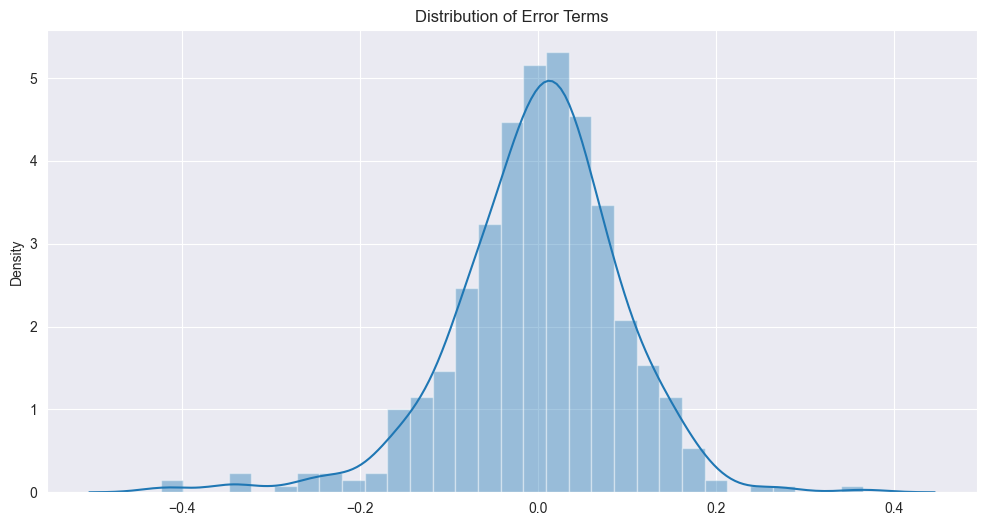

In [213]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

We can see Error terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality.

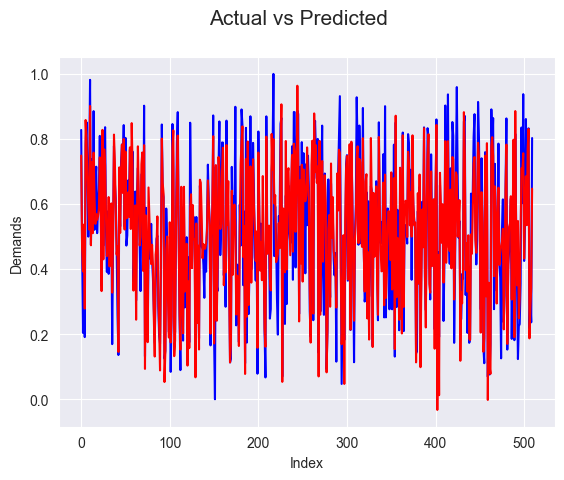

In [214]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Cross-verifying the above conclusion using a qq-plot as well:

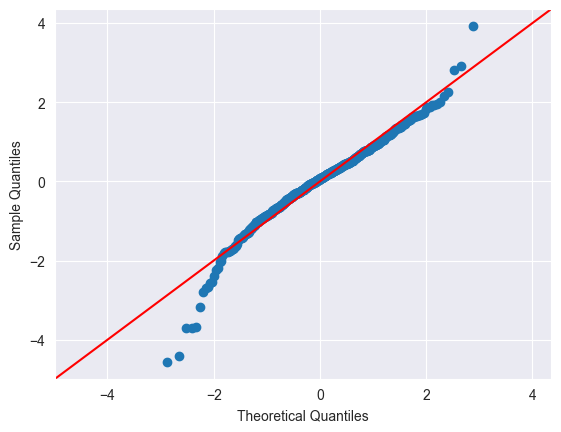

In [215]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

<h3>Looking for patterns in the residuals</h3>

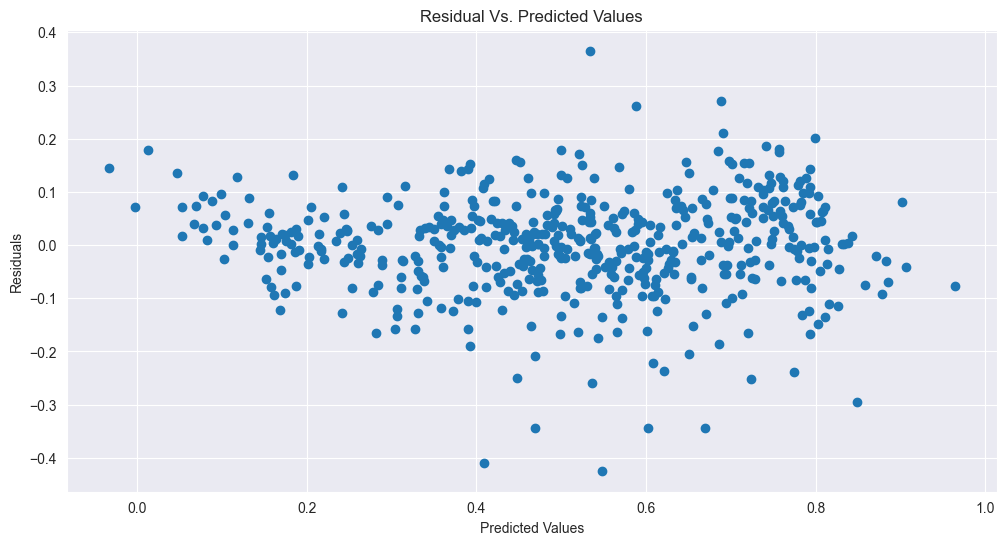

In [216]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.

<h3>Looking for Constant Variance</h3>

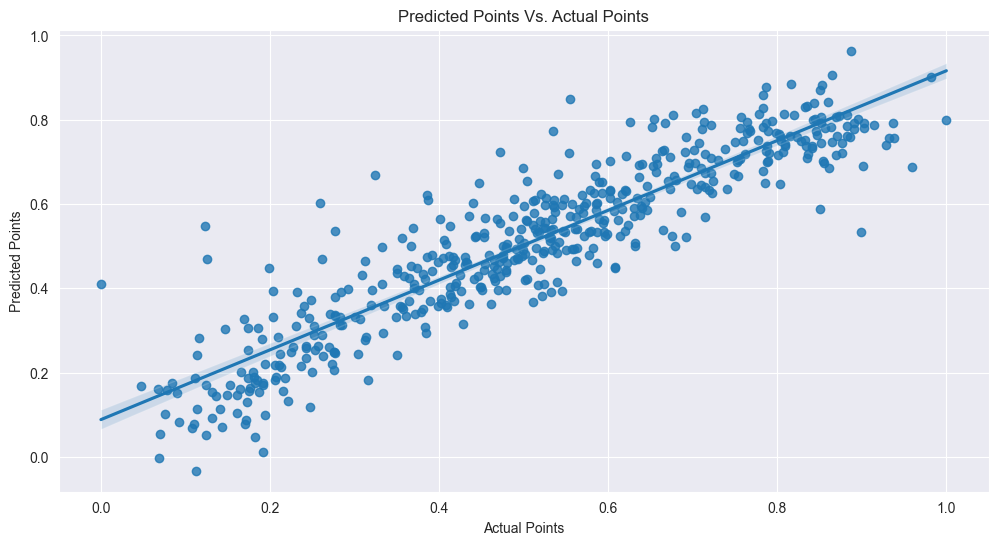

In [217]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

# Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

<h3>Applying the scaling on the test sets</h3>

In [218]:
test[scaler_vars] = scaler.transform(test[scaler_vars])
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


<h2>Dividing into X_test and y_test</h2>

In [219]:
y_test = test.pop('cnt')
X_test = test

#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [220]:
X_test.head(5)

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219
535,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414


In [221]:
#Printing feature variables
X_train_lr5.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'weekday_Monday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp'],
      dtype='object')

In [222]:
#dropping constant
X_train_lr5.drop(columns='const', inplace = True)

In [223]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [224]:
#making predictions
y_pred = lr_model.predict(X_test_new)

# Calculating the r-squared
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between the model and the dependent variable on a convenient 0 – 100% scale.

We can now validate the assumptions of linear regression in the model:
As we can see, temperature has a linear relationship with the dependent variable (cnt).

As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

In [225]:
from sklearn.metrics import r2_score
# Checking the Accuracy of the Test Model

#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

accuracy_difference_percentage = ((r2_train - r2_test) / (r2_train)) * 100
print('accuracy difference between the Train and Test Data', accuracy_difference_percentage)

r2 score on the test set is 0.7998429331697086
r2 score on the train set is 0.827679767267315
accuracy difference between the Train and Test Data 3.3632372323795083


The Final Model accuray is around `80%`, Which is a Good Score.

In [226]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp                            0.54
yr                              0.23
season_Winter                   0.15
mnth_Sep                        0.12
season_Summer                   0.10
const                           0.08
mnth_Aug                        0.06
weekday_Monday                 -0.05
weathersit_Mist & Cloudy       -0.08
holiday                        -0.11
weathersit_Light Snow & Rain   -0.30
dtype: float64

In [227]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.54 * temp + 0.23 * yr + 0.15 * season_Winter + 0.12 * mnth_Sep + 0.1 * season_Summer + 0.08 * const + 0.06 * mnth_Aug + -0.05 * weekday_Monday + -0.08 * weathersit_Mist & Cloudy + -0.11 * holiday + -0.3 * weathersit_Light Snow & Rain + 

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_13361/1775672720.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(beta[i],'*',beta.index[i],end ='')


Equation of Best Fit Line :

`0.54 * temp + 0.23 * yr + 0.15 * season_Winter + 0.12 * mnth_Sep + 0.1 * season_Summer + 0.08 * const + 0.06 * mnth_Aug + -0.05 * weekday_Monday + -0.08 * weathersit_Mist & Cloudy + -0.11 * holiday + -0.3 * weathersit_Light Snow & Rain`


# Model Evaluation
Plotting the graph for actual versus predicted values.

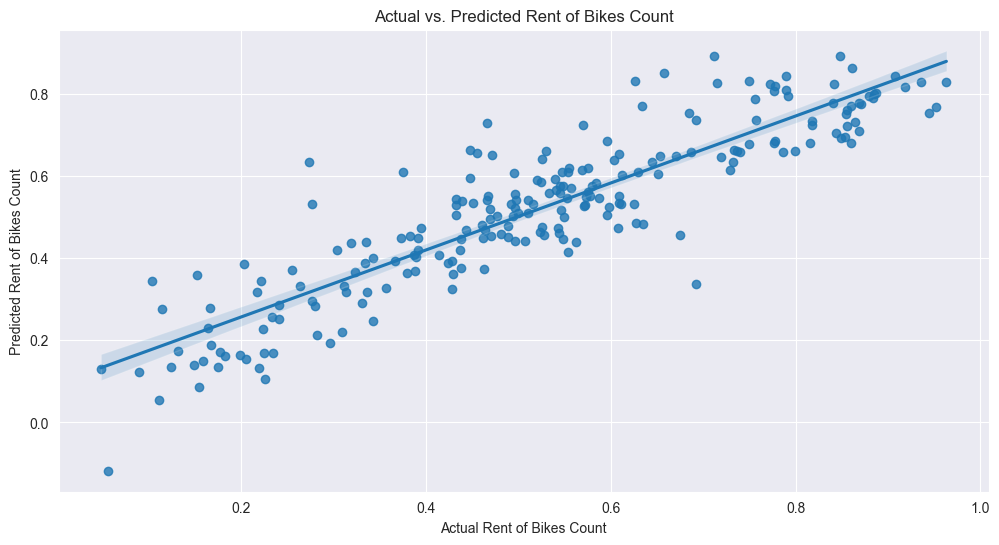

In [228]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

<h4>Getting the variable names and the coefficient values for the final equation of the best fitted line</h4>


# Final Conclusions:
<b>Demand of bikes depend on year, holiday, temp, season_Winter, season_Summer, august, sep, monday, Mist & Cloudy and Light Snow & Rain. </b>
<ul>
<li>Temperature is the most significant feature which affects the business positively.

<li>Environmental condition such as Light snow and raining, Humidity and Cloudy affects the business negatively.

<li>The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

<li> Demand of Bikes are more in August and September month.

<li>Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a profitable business.
</ul>